In [61]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import wordcloud 
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
movie_file = pd.read_csv('/Users/admin/Downloads/IMDb Movies India.csv', encoding='latin1')

In [5]:
movie_file


Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

In [7]:
movie_file.head(11)


Name    Year Duration  \
0                                          NaN      NaN   
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                          #Homecoming  (2021)   90 min   
3                              #Yaaram  (2019)  110 min   
4                    ...And Once Again  (2010)  105 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
7                       .in for Motion  (2008)   59 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   

                        Genre  Rating  Votes            Director  \
0                       Drama     NaN    NaN       J.S. Randhawa   
1                       Drama     7.0      8       Gaurav Bakshi   
2              Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3             Comedy, Romance     4.4     35          Ovais Khan   
4                       Drama     NaN    NaN        Amol Palekar   
5      Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6         Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                 Documentary     NaN    NaN       Anirban Datta   
8   Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9     Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   
10                      Drama     6.2     17         Madhu Ambat   

            Actor 1                 Actor 2          Actor 3  
0          Manmauji                  Birbal  Rajendra Bhatia  
1      Rasika Dugal          Vivek Ghamande    Arvind Jangid  
2      Sayani Gupta       Plabita Borthakur       Roy Angana  
3           Prateik              Ishita Raj  Siddhant Kapoor  
4      Rajat Kapoor      Rituparna Sengupta      Antara Mali  
5        Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6   Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
7               NaN                     NaN              NaN  
8         Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9         Augustine            Fathima Babu             Byon  
10   Rati Agnihotri          Gulshan Grover    Atul Kulkarni

In [9]:
movie_file.describe()


Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [11]:
movie_file.dtypes


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
movie_file.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
movie_file.isnull().sum().sum()


33523

In [17]:
movie_file.shape


(15509, 10)

In [19]:
movie_file.dropna(inplace = True)


In [27]:
movie_file.head(11)


Name    Year Duration  \
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                              #Yaaram  (2019)  110 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   
11                1:13:7 Ek Tera Saath  (2016)  120 min   
12                            100 Days  (1991)  161 min   
13                           100% Love  (2012)  166 min   
15                         102 Not Out  (2018)  102 min   

                        Genre  Rating  Votes           Director  \
1                       Drama     7.0      8      Gaurav Bakshi   
3             Comedy, Romance     4.4     35         Ovais Khan   
5      Comedy, Drama, Musical     4.7    827       Rahul Rawail   
6         Drama, Romance, War     7.4  1,086     Shoojit Sircar   
8   Horror, Mystery, Thriller     5.6    326      Allyson Patel   
9     Action, Crime, Thriller     4.0     11  Biju Bhaskar Nair   
10                      Drama     6.2     17        Madhu Ambat   
11                     Horror     5.9     59    Arshad Siddiqui   
12  Horror, Romance, Thriller     6.5    983       Partho Ghosh   
13     Comedy, Drama, Romance     5.7    512        Rabi Kinagi   
15              Comedy, Drama     7.4  6,619       Umesh Shukla   

             Actor 1                 Actor 2          Actor 3  
1       Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3            Prateik              Ishita Raj  Siddhant Kapoor  
5         Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6    Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
8          Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9          Augustine            Fathima Babu             Byon  
10    Rati Agnihotri          Gulshan Grover    Atul Kulkarni  
11      Pankaj Berry            Anubhav Dhir     Hritu Dudani  
12     Jackie Shroff           Madhuri Dixit    Javed Jaffrey  
13              Jeet           Koyel Mallick      Sujoy Ghosh  
15  Amitabh Bachchan            Rishi Kapoor       Vijay Raaz

In [29]:
movie_file.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [25]:
movie_file.isnull().sum().sum()


0

In [31]:
movie_file.shape


(5659, 10)

In [33]:
movie_file["Year"].head()


1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [35]:
genre = movie_file['Genre']


In [37]:
genre.head(11)


1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
Name: Genre, dtype: object

In [39]:
genres = movie_file['Genre'].str.split(', ', expand=True)
genres.head(11)

0        1         2
1    Drama     None      None
3   Comedy  Romance      None
5   Comedy    Drama   Musical
6    Drama  Romance       War
8   Horror  Mystery  Thriller
9   Action    Crime  Thriller
10   Drama     None      None
11  Horror     None      None
12  Horror  Romance  Thriller
13  Comedy    Drama   Romance
15  Comedy    Drama      None

In [41]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [43]:
genresPie = movie_file['Genre'].value_counts()
genresPie.head(11)

Genre
Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Action, Comedy, Drama     118
Name: count, dtype: int64

In [45]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(11)

Genre  Count
0                    Drama    844
1           Drama, Romance    332
2     Action, Crime, Drama    329
3            Action, Drama    206
4            Comedy, Drama    205
5   Comedy, Drama, Romance    188
6                   Comedy    187
7                   Action    170
8            Drama, Family    160
9                  Romance    126
10   Action, Comedy, Drama    118

In [47]:
movie_file['Votes'] = movie_file['Votes'].str.replace(',', '').astype(int)
movie_file['Votes'].head(11)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
15    6619
Name: Votes, dtype: int64

In [49]:
movie_file["Director"].nunique()

2431

In [51]:
directors = movie_file["Director"].value_counts()
directors.head(11)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
Name: count, dtype: int64

In [53]:
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']]).dropna().value_counts()
actors.head(11)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Govinda                90
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: can only concatenate str (not "int") to str

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

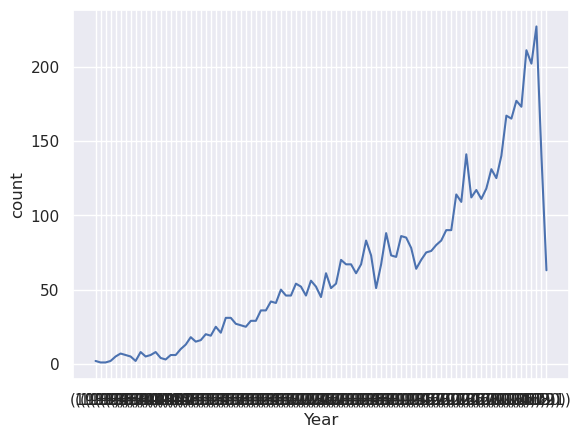

In [55]:
sb.set(style = "darkgrid", font = "Calibri")
ax = sb.lineplot(data=movie_file['Year'].value_counts().sort_index())
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_darkgrid(darkgrid_positions)
ax.set_darkgridlabels(darkgrid_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
mpl.show()

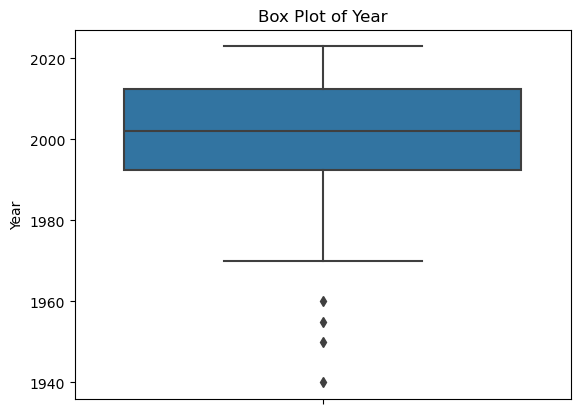

In [43]:

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
# You should load your actual dataset instead of this sample data
data = {
    'Year': [1940, 1950 , 1955, 1960, 1970, 1975 , 1980, 1985, 1990, 1991, 1992, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 1999, 2000, 
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
             2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
}
movie_file = pd.DataFrame(data)

# Ensure 'Year' column is converted to integers
movie_file['Year'] = pd.to_numeric(movie_file['Year'], errors='coerce').fillna(0).astype(int)

# Filter out invalid years (e.g., year 0 if used as a placeholder)
movie_file = movie_file[movie_file['Year'] > 0]

# Create the box plot
ax = sb.boxplot(data=movie_file, y='Year')

# Set labels and title
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')

# Show the plot
plt.show()


In [17]:
ax = sb.lineplot(data=movie_file.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_drakgrid(darkgrid_positions)
ax.set_darkgridlabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

NameError: name 'movie_file' is not defined

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


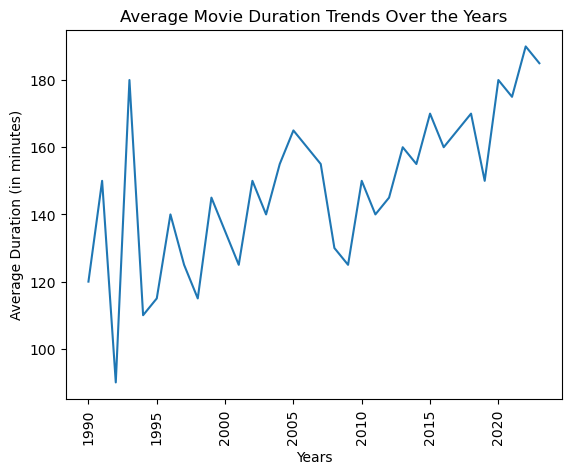

In [23]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
# You should load your actual dataset instead of this sample data
data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 1999, 2000, 
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
             2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Duration': [120, 150, 90, 180, 110, 100, 130, 140, 125, 115, 145, 135, 
                 125, 150, 140, 155, 165, 160, 155, 130, 125, 150, 140, 145, 
                 160, 155, 170, 160, 165, 170, 150, 180, 175, 190, 185]
}
movie_file = pd.DataFrame(data)

# Ensure 'Year' and 'Duration' columns are numeric
movie_file['Year'] = pd.to_numeric(movie_file['Year'], errors='coerce').fillna(0).astype(int)
movie_file['Duration'] = pd.to_numeric(movie_file['Duration'], errors='coerce').fillna(0).astype(int)

# Filter out invalid years and durations (e.g., year 0 or duration 0 if used as a placeholder)
movie_file = movie_file[(movie_file['Year'] > 0) & (movie_file['Duration'] > 0)]

# Calculate the mean duration per year
mean_duration_per_year = movie_file.groupby('Year')['Duration'].mean().reset_index()

# Create the line plot
ax = sb.lineplot(data=mean_duration_per_year, x='Year', y='Duration')

# Set labels and title
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration (in minutes)')

# Set x-axis ticks
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)

# Show the plot
plt.show()


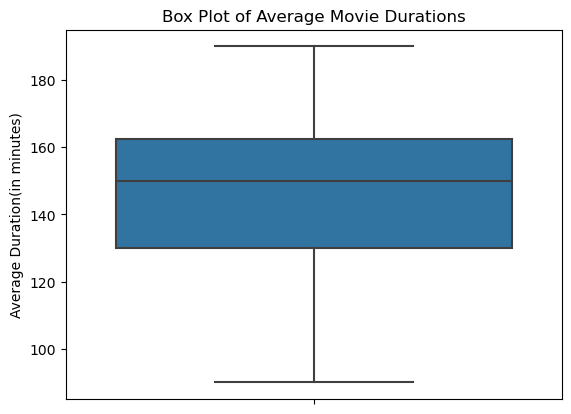

In [25]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1995, 1996, 1997, 1998, 1999, 2000, 
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
             2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Duration': [120, 150, 90, 180, 110, 100, 130, 140, 125, 115, 145, 135, 
                 125, 150, 140, 155, 165, 160, 155, 130, 125, 150, 140, 145, 
                 160, 155, 170, 160, 165, 170, 150, 180, 175, 190, 185]
}
movie_file = pd.DataFrame(data)

ax = sb.boxplot(data=movie_file, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


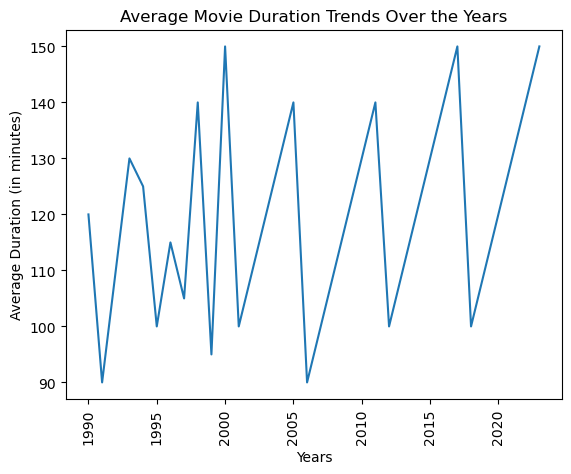

In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 
             2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Duration': [120, 90, 110, 130, 125, 100, 115, 105, 140, 95, 150, 100, 
                 110, 120, 130, 140, 90, 100, 110, 120, 130, 140, 100, 110, 
                 120, 130, 140, 150, 100, 110, 120, 130, 140, 150]
}

# Create DataFrame
movie_file = pd.DataFrame(data)

# Group by 'Year' and calculate the mean 'Duration'
yearly_duration = movie_file.groupby('Year')['Duration'].mean().reset_index()

# Create the line plot
ax = sb.lineplot(data=yearly_duration, x='Year', y='Duration')

# Set title and labels
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel("Average Duration (in minutes)")

# Set x-axis ticks and labels
tick_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)

# Show the plot
plt.show()


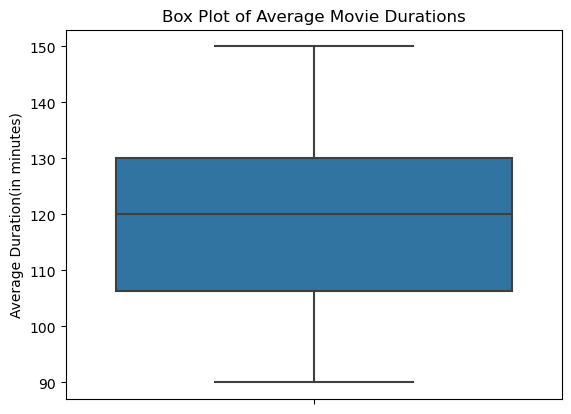

In [47]:
ax = sb.boxplot(data=movie_file, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [49]:
Q1 = movie_file['Duration'].quantile(0.25)
Q3 = movie_file['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = movie_file[(movie_file['Duration'] >= lower_bound) & (movie_file['Duration'] <= upper_bound)]
df.head(11)

Year  Duration
0   1990       120
1   1991        90
2   1992       110
3   1993       130
4   1994       125
5   1995       100
6   1996       115
7   1997       105
8   1998       140
9   1999        95
10  2000       150

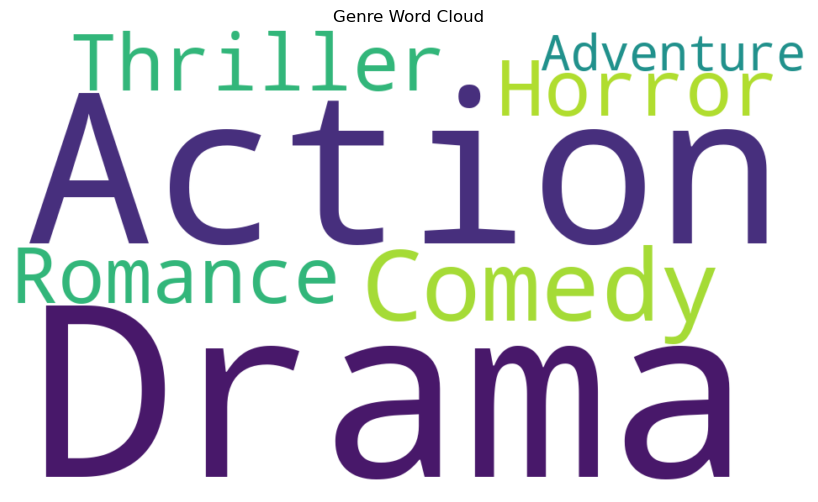

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data for demonstration purposes
data = {
    'Genre': ['Action, Drama, Thriller', 'Comedy, Drama', 'Action, Comedy', 'Drama, Romance',
              'Thriller, Horror', 'Comedy', 'Action, Adventure', 'Drama', 'Romance', 'Horror']
}
movie_file = pd.DataFrame(data)

# Generate genre word cloud
genre_counts = movie_file['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)

# Display the word cloud
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # turn off axis
plt.title('Genre Word Cloud')
plt.show()


In [65]:
genreLabels = sorted(genereCounts.keys())
genreCounts = sorted(genereCounts.values())
ax = sb.barplot(x = genreLabels, y = genreCounts)
ax.set_xdarkgridlabels(labels=genreLabels, rotation = 90)
mpl.show()

NameError: name 'genereCounts' is not defined

In [67]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'Genre': ['Action', 'Drama', 'Thriller', 'Comedy', 'Romance', 'Horror', 'Adventure']
}
movie_file = pd.DataFrame(data)

# Count occurrences of each genre
genre_counts = movie_file['Genre'].value_counts()

# Sort genre labels and counts
genre_labels = sorted(genre_counts.keys())
genre_counts = sorted(genre_counts.values())

# Create bar plot
ax = sb.barplot(x=genre_labels, y=genre_counts)

# Set x-axis labels and rotation
ax.set_xticklabels(labels=genre_labels, rotation=90)

# Set plot title
plt.title('Genre Counts')

# Show the plot
plt.show()


TypeError: 'numpy.ndarray' object is not callable

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


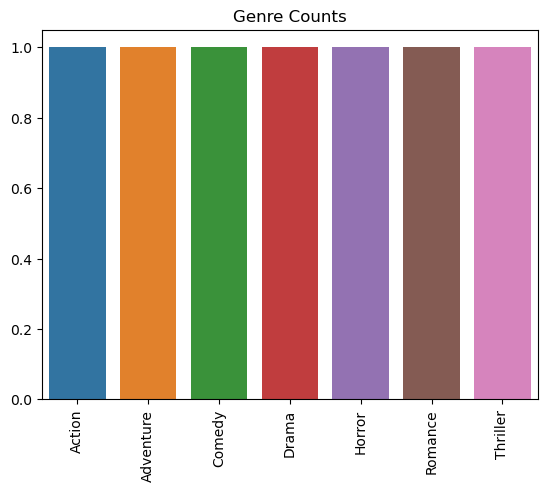

In [69]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Sample data for demonstration purposes
data = {
    'Genre': ['Action', 'Drama', 'Thriller', 'Comedy', 'Romance', 'Horror', 'Adventure']
}
movie_file = pd.DataFrame(data)

# Count occurrences of each genre
genre_counts = movie_file['Genre'].value_counts()

# Sort genre labels and counts
genre_labels = sorted(genre_counts.keys())
genre_counts = sorted(genre_counts.values)

# Create bar plot
ax = sb.barplot(x=genre_labels, y=genre_counts)

# Set x-axis labels and rotation
ax.set_xticklabels(labels=genre_labels, rotation=90)

# Set plot title
plt.title('Genre Counts')

# Show the plot
plt.show()


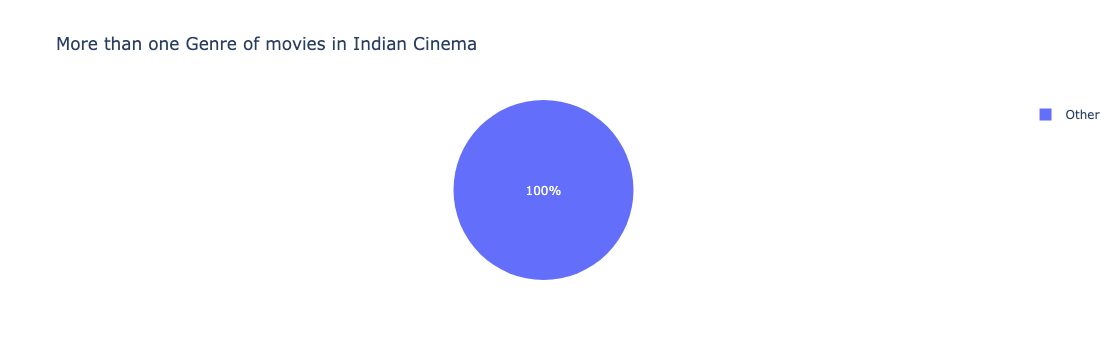

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



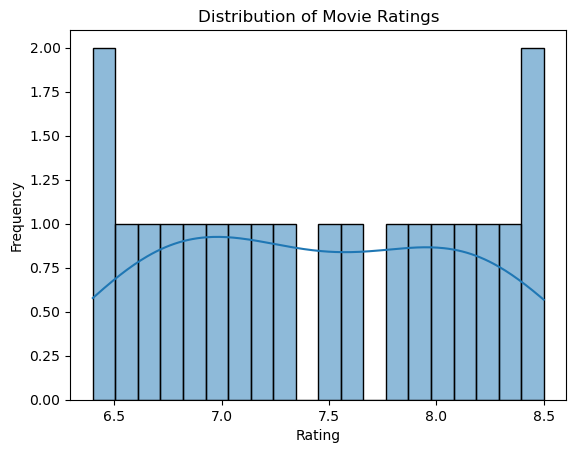

In [75]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

# Sample data for demonstration purposes
data = {
    'Genre': ['Action', 'Drama', 'Thriller', 'Comedy', 'Romance', 'Horror', 'Adventure'],
    'Count': [100, 200, 300, 400, 500, 600, 700]  # Example counts for each genre (adjusted for range)
}
genrePie = pd.DataFrame(data)

# Assign 'Other' to genres with counts less than 800
genrePie.loc[genrePie['Count'] < 800, 'Genre'] = 'Other'

# Create pie chart
fig = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
fig.show()

# Sample movie ratings data
movie_ratings = pd.DataFrame({
    'Rating': [7.5, 8.2, 6.9, 8.5, 7.1, 6.8, 7.3, 8.0, 6.5, 7.9, 8.1, 7.2, 6.7, 7.6, 8.3, 6.6, 7.8, 7.0, 8.4, 6.4]
})

# Create histogram of movie ratings
ax = sb.histplot(data=movie_ratings, x="Rating", bins=20, kde=True)

# Set labels and title for histogram
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')

# Show the plot
plt.show()


In [83]:
import pandas as pd

# Load the data from CSV file
movie_file = pd.read_csv('/Users/admin/Downloads/IMDb Movies India.csv', encoding='latin1')

# Print the column names to verify 'Rating' exists
print(movie_file.columns)

# Calculate IQR and filter outliers
Q1 = movie_file['Rating'].quantile(0.25)
Q3 = movie_file['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Rating'] >= lower_bound) & (movie_file['Rating'] <= upper_bound)]
print(movie_file.head(16))  # Display the first 16 rows after filtering


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
                                  Name    Year Duration  \
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                              #Yaaram  (2019)  110 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   
11                1:13:7 Ek Tera Saath  (2016)  120 min   
12                            100 Days  (1991)  161 min   
13                           100% Love  (2012)  166 min   
15                         102 Not Out  (2018)  102 min   
18                           10ml LOVE  (2010)   87 min   
21                          12 O'Clock  (1958)  132 min   
22                          12 O'Clo

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



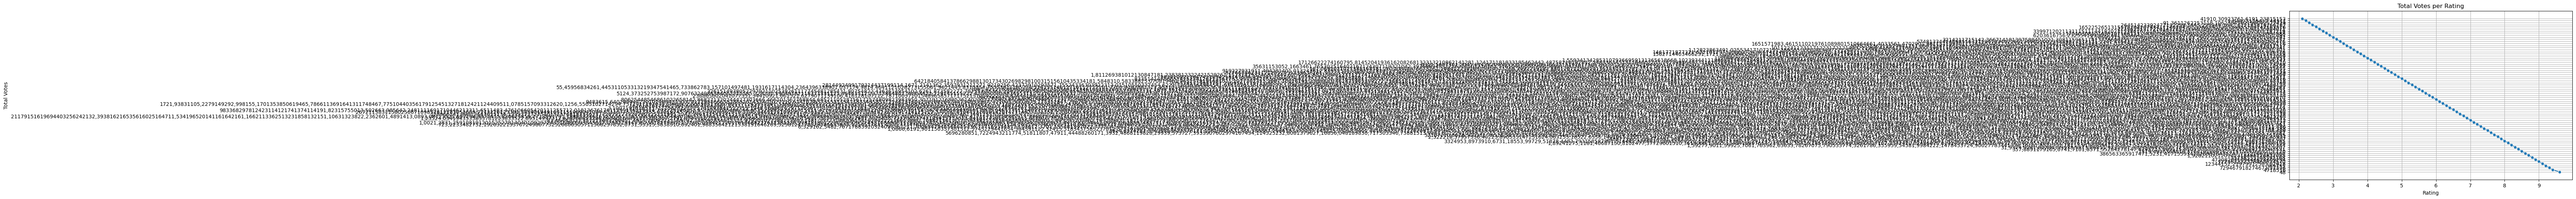

In [87]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl

# Assuming movie_file is already loaded with the relevant data
# For example:
# movie_file = pd.read_csv('/Users/admin/Downloads/IMDb Movies India.csv', encoding='latin1')

# Grouping and aggregating data
rating_votes = movie_file.groupby('Rating')['Votes'].sum().reset_index()

# Sorting by Rating for proper plotting order
rating_votes = rating_votes.sort_values(by='Rating')

# Plotting with Seaborn and Matplotlib
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
ax_line_seaborn.grid(True)  # Add grid lines for better readability
mpl.show()


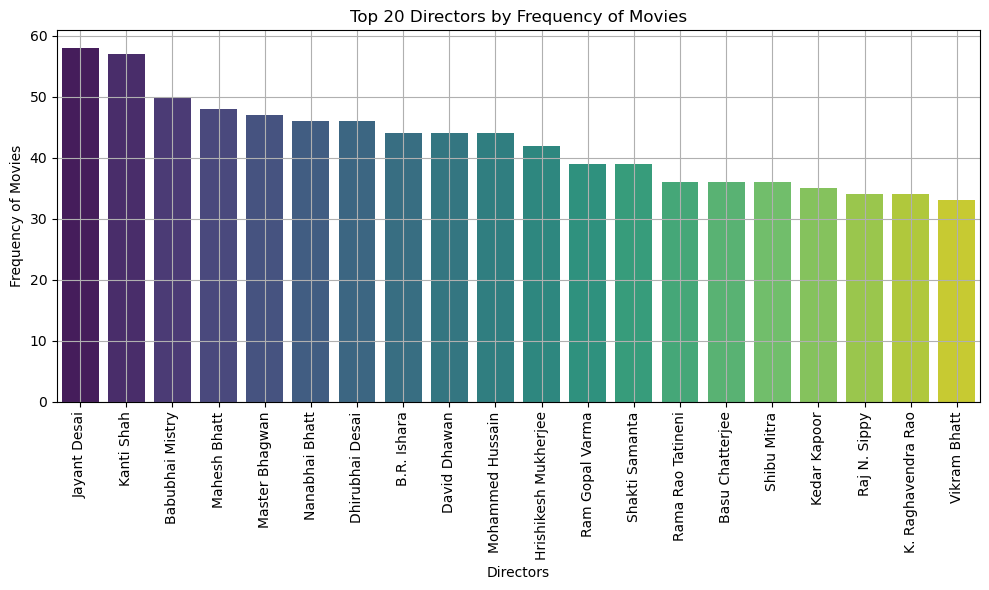

In [91]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl

# Load the data from CSV file
file_path = '/Users/admin/Downloads/IMDb Movies India.csv'
movie_file = pd.read_csv(file_path, encoding='latin1')

# Assuming 'Director' column exists in your dataset
# Count occurrences of each director
directors = movie_file['Director'].value_counts().head(20)

# Plotting with Seaborn and Matplotlib
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.index, y=directors.values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
ax.grid(True)  # Add grid lines
mpl.tight_layout()  # Adjust layout to prevent clipping of labels
mpl.show()


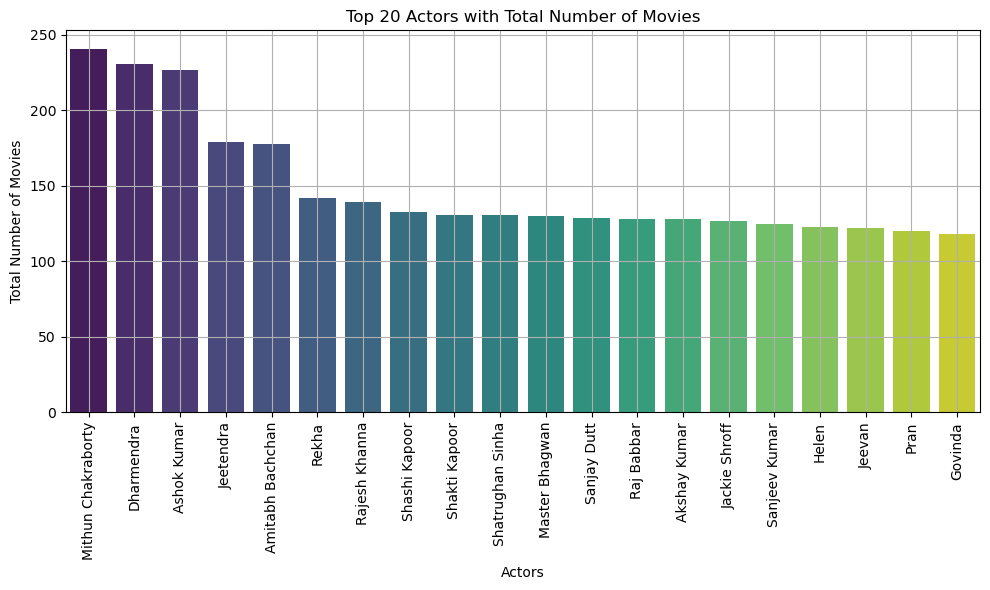

In [93]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl

# Load the data from CSV file
file_path = '/Users/admin/Downloads/IMDb Movies India.csv'
movie_file = pd.read_csv(file_path, encoding='latin1')

# Combine counts from 'Actor 1', 'Actor 2', and 'Actor 3' columns
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']], ignore_index=True).value_counts().head(20)

# Plotting with Seaborn and Matplotlib
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.index, y=actors.values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability
ax.grid(True)  # Add grid lines
mpl.tight_layout()  # Adjust layout to prevent clipping of labels
mpl.show()


In [95]:
movie_file["Actor"] = movie_file['Actor 1'] + ', ' + movie_file['Actor 2'] + ', ' + movie_file['Actor 3']
movie_file["Directors"] = movie_file['Director'].astype('category').cat.codes
movie_file["Genres"] = movie_file['Genre'].astype('category').cat.codes
movie_file["Actors"] = movie_file['Actor'].astype('category').cat.codes
movie_file.head(16)


Name    Year Duration  \
0                                          NaN      NaN   
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                          #Homecoming  (2021)   90 min   
3                              #Yaaram  (2019)  110 min   
4                    ...And Once Again  (2010)  105 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
7                       .in for Motion  (2008)   59 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   
11                1:13:7 Ek Tera Saath  (2016)  120 min   
12                            100 Days  (1991)  161 min   
13                           100% Love  (2012)  166 min   
14                          101 Ratein  (1990)      NaN   
15                         102 Not Out  (2018)  102 min   

                        Genre  Rating  Votes            Director  \
0                       Drama     NaN    NaN       J.S. Randhawa   
1                       Drama     7.0      8       Gaurav Bakshi   
2              Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3             Comedy, Romance     4.4     35          Ovais Khan   
4                       Drama     NaN    NaN        Amol Palekar   
5      Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6         Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                 Documentary     NaN    NaN       Anirban Datta   
8   Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9     Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   
10                      Drama     6.2     17         Madhu Ambat   
11                     Horror     5.9     59     Arshad Siddiqui   
12  Horror, Romance, Thriller     6.5    983        Partho Ghosh   
13     Comedy, Drama, Romance     5.7    512         Rabi Kinagi   
14                   Thriller     NaN    NaN              Harish   
15              Comedy, Drama     7.4  6,619        Umesh Shukla   

             Actor 1                 Actor 2          Actor 3  \
0           Manmauji                  Birbal  Rajendra Bhatia   
1       Rasika Dugal          Vivek Ghamande    Arvind Jangid   
2       Sayani Gupta       Plabita Borthakur       Roy Angana   
3            Prateik              Ishita Raj  Siddhant Kapoor   
4       Rajat Kapoor      Rituparna Sengupta      Antara Mali   
5         Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6    Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
7                NaN                     NaN              NaN   
8          Yash Dave          Muntazir Ahmad     Kiran Bhatia   
9          Augustine            Fathima Babu             Byon   
10    Rati Agnihotri          Gulshan Grover    Atul Kulkarni   
11      Pankaj Berry            Anubhav Dhir     Hritu Dudani   
12     Jackie Shroff           Madhuri Dixit    Javed Jaffrey   
13              Jeet           Koyel Mallick      Sujoy Ghosh   
14         Saraswati            Disco Shanti              NaN   
15  Amitabh Bachchan            Rishi Kapoor       Vijay Raaz   

                                                Actor  Directors  Genres  \
0                   Manmauji, Birbal, Rajendra Bhatia       1926     299   
1         Rasika Dugal, Vivek Ghamande, Arvind Jangid       1548     299   
2         Sayani Gupta, Plabita Borthakur, Roy Angana       5123     351   
3                Prateik, Ishita Raj, Siddhant Kapoor       3319     228   
4       Rajat Kapoor, Rituparna Sengupta, Antara Mali        385     299   
5   Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor       3800     197   
6     Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma       4993     366   
7                                                 NaN        475     262   
8             Yash Dave, Muntazir Ahmad, Kiran Bhatia        305     418   
9      

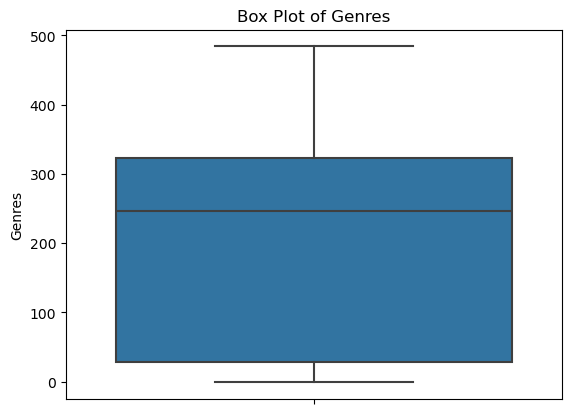

In [97]:
ax = sb.boxplot(data=movie_file, y='Genres')
ax.set_ylabel('Genres')
ax.set_title('Box Plot of Genres')
mpl.show()

In [99]:
Q1 = movie_file['Genres'].quantile(0.25)
Q3 = movie_file['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Genres'] >= lower_bound) & (movie_file['Genres'] <= upper_bound)]
movie_file.head(11)

Name    Year Duration  \
0                                          NaN      NaN   
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                          #Homecoming  (2021)   90 min   
3                              #Yaaram  (2019)  110 min   
4                    ...And Once Again  (2010)  105 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
7                       .in for Motion  (2008)   59 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   

                        Genre  Rating  Votes            Director  \
0                       Drama     NaN    NaN       J.S. Randhawa   
1                       Drama     7.0      8       Gaurav Bakshi   
2              Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3             Comedy, Romance     4.4     35          Ovais Khan   
4                       Drama     NaN    NaN        Amol Palekar   
5      Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6         Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                 Documentary     NaN    NaN       Anirban Datta   
8   Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9     Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   
10                      Drama     6.2     17         Madhu Ambat   

            Actor 1                 Actor 2          Actor 3  \
0          Manmauji                  Birbal  Rajendra Bhatia   
1      Rasika Dugal          Vivek Ghamande    Arvind Jangid   
2      Sayani Gupta       Plabita Borthakur       Roy Angana   
3           Prateik              Ishita Raj  Siddhant Kapoor   
4      Rajat Kapoor      Rituparna Sengupta      Antara Mali   
5        Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6   Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
7               NaN                     NaN              NaN   
8         Yash Dave          Muntazir Ahmad     Kiran Bhatia   
9         Augustine            Fathima Babu             Byon   
10   Rati Agnihotri          Gulshan Grover    Atul Kulkarni   

                                                Actor  Directors  Genres  \
0                   Manmauji, Birbal, Rajendra Bhatia       1926     299   
1         Rasika Dugal, Vivek Ghamande, Arvind Jangid       1548     299   
2         Sayani Gupta, Plabita Borthakur, Roy Angana       5123     351   
3                Prateik, Ishita Raj, Siddhant Kapoor       3319     228   
4       Rajat Kapoor, Rituparna Sengupta, Antara Mali        385     299   
5   Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor       3800     197   
6     Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma       4993     366   
7                                                 NaN        475     262   
8             Yash Dave, Muntazir Ahmad, Kiran Bhatia        305     418   
9                       Augustine, Fathima Babu, Byon        987      38   
10      Rati Agnihotri, Gulshan Grover, Atul Kulkarni       2667     299   

    Actors  
0     5877  
1     8698  
2     9805  
3     7581  
4     8072  
5     2386  
6     4666  
7       -1  
8    12110  
9     1867  
10    8710

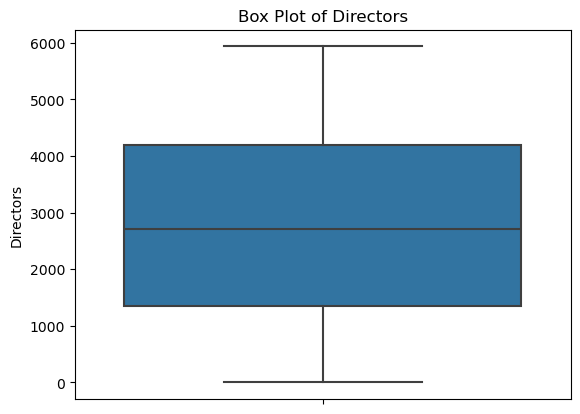

In [101]:
ax = sb.boxplot(data=movie_file, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')
mpl.show()

In [103]:
movie_file.head(11)


Name    Year Duration  \
0                                          NaN      NaN   
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                          #Homecoming  (2021)   90 min   
3                              #Yaaram  (2019)  110 min   
4                    ...And Once Again  (2010)  105 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
7                       .in for Motion  (2008)   59 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   

                        Genre  Rating  Votes            Director  \
0                       Drama     NaN    NaN       J.S. Randhawa   
1                       Drama     7.0      8       Gaurav Bakshi   
2              Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3             Comedy, Romance     4.4     35          Ovais Khan   
4                       Drama     NaN    NaN        Amol Palekar   
5      Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6         Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                 Documentary     NaN    NaN       Anirban Datta   
8   Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9     Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   
10                      Drama     6.2     17         Madhu Ambat   

            Actor 1                 Actor 2          Actor 3  \
0          Manmauji                  Birbal  Rajendra Bhatia   
1      Rasika Dugal          Vivek Ghamande    Arvind Jangid   
2      Sayani Gupta       Plabita Borthakur       Roy Angana   
3           Prateik              Ishita Raj  Siddhant Kapoor   
4      Rajat Kapoor      Rituparna Sengupta      Antara Mali   
5        Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6   Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
7               NaN                     NaN              NaN   
8         Yash Dave          Muntazir Ahmad     Kiran Bhatia   
9         Augustine            Fathima Babu             Byon   
10   Rati Agnihotri          Gulshan Grover    Atul Kulkarni   

                                                Actor  Directors  Genres  \
0                   Manmauji, Birbal, Rajendra Bhatia       1926     299   
1         Rasika Dugal, Vivek Ghamande, Arvind Jangid       1548     299   
2         Sayani Gupta, Plabita Borthakur, Roy Angana       5123     351   
3                Prateik, Ishita Raj, Siddhant Kapoor       3319     228   
4       Rajat Kapoor, Rituparna Sengupta, Antara Mali        385     299   
5   Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor       3800     197   
6     Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma       4993     366   
7                                                 NaN        475     262   
8             Yash Dave, Muntazir Ahmad, Kiran Bhatia        305     418   
9                       Augustine, Fathima Babu, Byon        987      38   
10      Rati Agnihotri, Gulshan Grover, Atul Kulkarni       2667     299   

    Actors  
0     5877  
1     8698  
2     9805  
3     7581  
4     8072  
5     2386  
6     4666  
7       -1  
8    12110  
9     1867  
10    8710

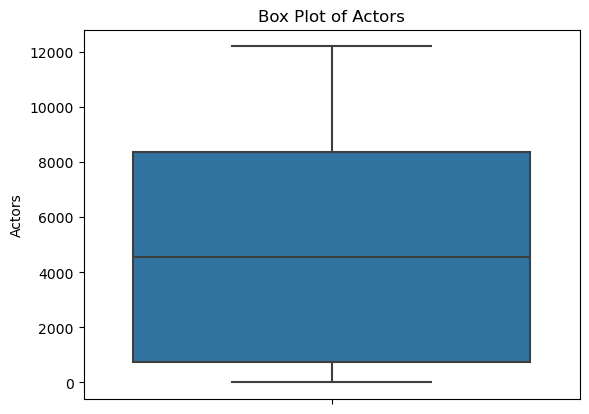

In [105]:
ax = sb.boxplot(data=movie_file, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')
mpl.show()

In [107]:
Q1 = movie_file['Actors'].quantile(0.25)
Q3 = movie_file['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Actors'] >= lower_bound) & (movie_file['Actors'] <= upper_bound)]
movie_file.head(11)

Name    Year Duration  \
0                                          NaN      NaN   
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                          #Homecoming  (2021)   90 min   
3                              #Yaaram  (2019)  110 min   
4                    ...And Once Again  (2010)  105 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
7                       .in for Motion  (2008)   59 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   

                        Genre  Rating  Votes            Director  \
0                       Drama     NaN    NaN       J.S. Randhawa   
1                       Drama     7.0      8       Gaurav Bakshi   
2              Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3             Comedy, Romance     4.4     35          Ovais Khan   
4                       Drama     NaN    NaN        Amol Palekar   
5      Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6         Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                 Documentary     NaN    NaN       Anirban Datta   
8   Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9     Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   
10                      Drama     6.2     17         Madhu Ambat   

            Actor 1                 Actor 2          Actor 3  \
0          Manmauji                  Birbal  Rajendra Bhatia   
1      Rasika Dugal          Vivek Ghamande    Arvind Jangid   
2      Sayani Gupta       Plabita Borthakur       Roy Angana   
3           Prateik              Ishita Raj  Siddhant Kapoor   
4      Rajat Kapoor      Rituparna Sengupta      Antara Mali   
5        Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6   Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
7               NaN                     NaN              NaN   
8         Yash Dave          Muntazir Ahmad     Kiran Bhatia   
9         Augustine            Fathima Babu             Byon   
10   Rati Agnihotri          Gulshan Grover    Atul Kulkarni   

                                                Actor  Directors  Genres  \
0                   Manmauji, Birbal, Rajendra Bhatia       1926     299   
1         Rasika Dugal, Vivek Ghamande, Arvind Jangid       1548     299   
2         Sayani Gupta, Plabita Borthakur, Roy Angana       5123     351   
3                Prateik, Ishita Raj, Siddhant Kapoor       3319     228   
4       Rajat Kapoor, Rituparna Sengupta, Antara Mali        385     299   
5   Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor       3800     197   
6     Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma       4993     366   
7                                                 NaN        475     262   
8             Yash Dave, Muntazir Ahmad, Kiran Bhatia        305     418   
9                       Augustine, Fathima Babu, Byon        987      38   
10      Rati Agnihotri, Gulshan Grover, Atul Kulkarni       2667     299   

    Actors  
0     5877  
1     8698  
2     9805  
3     7581  
4     8072  
5     2386  
6     4666  
7       -1  
8    12110  
9     1867  
10    8710

In [109]:
Input = movie_file.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = movie_file['Rating']
Input.head(16)

Year Duration  Votes  Directors  Genres  Actors
0      NaN      NaN    NaN       1926     299    5877
1   (2019)  109 min      8       1548     299    8698
2   (2021)   90 min    NaN       5123     351    9805
3   (2019)  110 min     35       3319     228    7581
4   (2010)  105 min    NaN        385     299    8072
5   (1997)  147 min    827       3800     197    2386
6   (2005)  142 min  1,086       4993     366    4666
7   (2008)   59 min    NaN        475     262      -1
8   (2012)   82 min    326        305     418   12110
9   (2014)  116 min     11        987      38    1867
10  (2004)   96 min     17       2667     299    8710
11  (2016)  120 min     59        614     409    7312
12  (1991)  161 min    983       3418     421    4251
13  (2012)  166 min    512       3751     199    4481
14  (1990)      NaN    NaN       1741     479      -1
15  (2018)  102 min  6,619       5546     191     938

In [111]:
Output.head(16)

0     NaN
1     7.0
2     NaN
3     4.4
4     NaN
5     4.7
6     7.4
7     NaN
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
14    NaN
15    7.4
Name: Rating, dtype: float64

In [113]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load your data
movie_file = pd.read_csv('/Users/admin/Downloads/IMDb Movies India.csv', encoding='latin1')

# Preprocess your data
# Example: convert categorical variables to numerical
for column in movie_file.select_dtypes(include=['object']).columns:
    movie_file[column] = movie_file[column].astype('category').cat.codes

# Handle missing values
imputer = SimpleImputer(strategy='mean')
movie_file = pd.DataFrame(imputer.fit_transform(movie_file), columns=movie_file.columns)

# Define your feature columns and target variable
X = movie_file.drop('Rating', axis=1)  # Drop the target column
y = movie_file['Rating']

# Split your data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 12407, number of used features: 9
[LightGBM] [Info] Start training from score 5.847432


In [131]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 39.59%
Mean Squared Error = 0.96

Model:  RANDOM FOREST
Accuracy = 233.29%
Mean Squared Error = 0.86

Model:  DECEISION TREE
Accuracy = -573.92%
Mean Squared Error = 1.23

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 198.68%
Mean Squared Error = 0.88

Model:  GRADIENT BOOSTING
Accuracy = 219.54%
Mean Squared Error = 0.87

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 257.86%
Mean Squared Error = 0.85

Model:  CAT BOOST
Accuracy = 210.72%
Mean Squared Error = 0.87

Model:  K NEAREST NEIGHBORS
Accuracy = -158.82%
Mean Squared Error = 1.06



In [133]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "Cat Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, CBRScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

MODELS  SCORES
5     Light Gradient Boosting  257.86
1               Random Forest  233.29
3           Gradient Boosting  219.54
6                Cat Boosting  210.72
4  Extended Gradient Boosting  198.68
0           Linear Regression   39.59
7         K Nearest Neighbors -158.82
2               Decision Tree -573.92